#**Book Recommendation System**

###A recommendation engine is a class of machine learning which offers relevant suggestions to the customer. It helps an organization to create loyal customers and build trust by them desired products and services for which they came on your site. The recommendation system today are so powerful that they can handle the new customer too who has visited the site for the first time. They recommend the products which are currently trending or highly rated and they can also recommend the products which bring maximum profit to the company.

###A book recommendation system is a type of recommendation system where we have to recommend similar books to the reader based on his interest. The books recommendation system is used by online websites which provide ebooks like google play books, open library, good Read’s, etc.

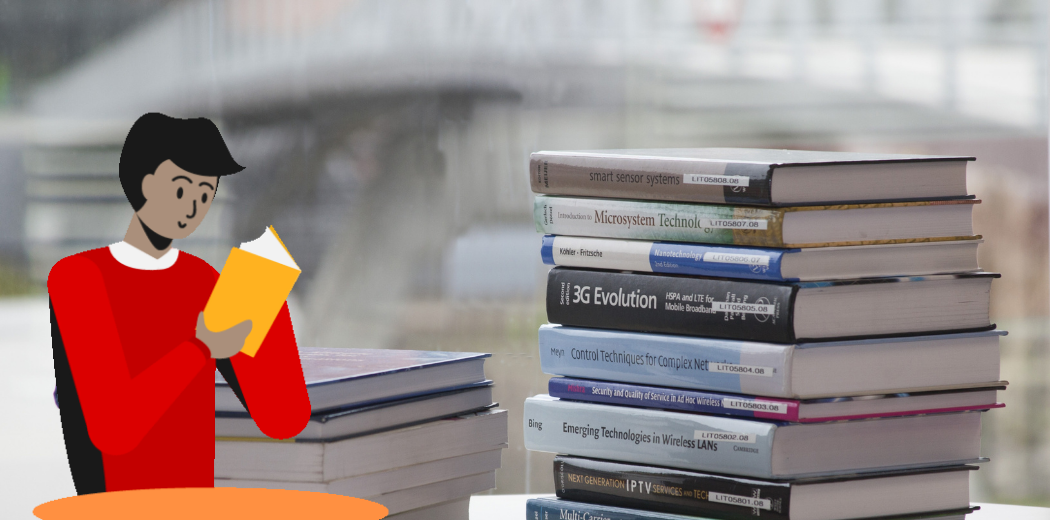

In [ ]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# loading the required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import re

In [ ]:
#Loading the dataset
drive_path = '/content/drive/MyDrive/Colab Notebooks/project/Book Recommendation System/'

books_df=pd.read_csv(drive_path +"Books.csv")
ratings_df=pd.read_csv(drive_path +"Ratings.csv")
users_df=pd.read_csv(drive_path +"Users.csv")

#**Pre-processing of datasets**

####We have three different datasets which contains details of books, users and book ratings. Let's deep dive into each of those datasets.

##**Books**

In [ ]:
#first look
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
#Checking basic information
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


####The last three columns contains no information that helps in the analysis process, hence we consider only the first 5 columns for further process.

In [ ]:
#Taking the required subset
books_df=books_df[["ISBN","Book-Title","Book-Author",	"Year-Of-Publication", "Publisher"]]

In [ ]:
# Checking for null values
books_df.isnull().sum() 

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

In [ ]:
#obtaining the rows that contain null values
books_df[books_df.isnull().any(axis=1)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


####We can see that the column Book-Author contains one null value and the column Publisher contains two null values. Therefore we replace them by 'Unknown'.

In [ ]:
#Replacing null values by 'Unknown'
books_df.fillna("Unknown",inplace=True)

In [ ]:
#Checking the datatype 
books_df.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
dtype: object

In [ ]:
#Obatining the unique years 
books_df["Year-Of-Publication"].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

####While checking the unique years we can see that two years are mistakenly replaced by some text. Let's try to fix this issue.

In [ ]:
pd.set_option('display.max_colwidth', -1)

In [ ]:
books_df[books_df["Year-Of-Publication"]=='Gallimard']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg


In [ ]:
books_df[books_df["Year-Of-Publication"]=='DK Publishing Inc']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg


####We can see that for these three rows, the values have been interchanged mistakenly. So we will correct this mistake.

In [ ]:
#Interchanging the values
books_df.at[209538 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'
books_df.at[209538 ,'Book-Author'] = 'Michael Teitelbaum'
books_df.at[209538 ,'Publisher'] = 'DK Publishing Inc'
books_df.at[209538 ,'Year-Of-Publication'] = '2000'

books_df.at[221678 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'
books_df.at[221678 ,'Book-Author'] = 'James Buckley'
books_df.at[221678 ,'Publisher'] = 'DK Publishing Inc'
books_df.at[221678 ,'Year-Of-Publication'] = '2000'

books_df.at[220731 ,'Book-Title'] = 'Peuple du ciel - Suivi de Les bergers '
books_df.at[220731 ,'Book-Author'] = 'Jean-Marie Gustave Le ClÃ?Â©zio'
books_df.at[220731 ,'Publisher'] = 'Gallimard'
books_df.at[220731 ,'Year-Of-Publication'] = '2003'

In [ ]:
#Converting year into int 
books_df['Year-Of-Publication'] = books_df['Year-Of-Publication'].astype(int)
#Checking info after converting Year-Of-Publication into integer
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271360 non-null  object
 3   Year-Of-Publication  271360 non-null  int64 
 4   Publisher            271360 non-null  object
dtypes: int64(1), object(4)
memory usage: 10.4+ MB


In [ ]:
#Getting the years in ascending order
print(sorted(list(books_df['Year-Of-Publication'].unique())))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


####In the column Year of Publication there are invalid values such as 0 and greater than the present year. We will replace such values by mode.

In [ ]:
#Imputing invalid values by mode
print("The mode of year of publication is:",books_df['Year-Of-Publication'].mode()[0])
books_df[books_df['Year-Of-Publication'] > 2021] = books_df['Year-Of-Publication'].mode()[0]
books_df[books_df['Year-Of-Publication'] == 0] = books_df['Year-Of-Publication'].mode()[0]
#Checking for unique years after replacement
print(sorted(list(books_df['Year-Of-Publication'].unique())))

The mode of year of publication is: 2002
[1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021]


In [ ]:
# Uppercasing all alphabets in ISBN
books_df['ISBN'] = books_df['ISBN'].str.upper()

#Checking for duplicates
print("Number of duplicates is:",len(books_df[books_df.duplicated()]))
# Drop duplicate rows
books_df.drop_duplicates(keep='last', inplace=True) 
books_df.reset_index(drop = True, inplace = True)

Number of duplicates is: 4936


In [ ]:
#Checking for the shape
print("Shape of books_df is:",books_df.shape)

Shape of books_df is: (266424, 5)


##**Users**

In [ ]:
#First look
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
#Checking bacis info
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [ ]:
#Checking for null values
users_df.isnull().sum()

User-ID     0     
Location    0     
Age         110762
dtype: int64

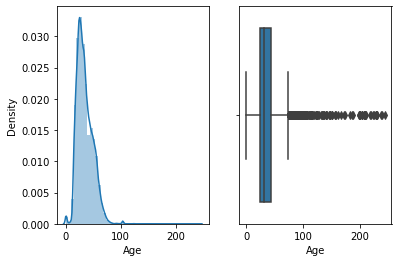

In [ ]:
plt.subplot(1, 2, 1)
sns.distplot(users_df["Age"])
plt.subplot(1, 2, 2)
sns.boxplot(users_df["Age"])

In [ ]:
# checking for unique values
print(sorted(list(users_df['Age'].unique())))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

####There are so many invalid entries in this column. So we will replace those with median. Here we will fix the lower age limit as 10 and upper age limit as 90.

In [ ]:
# Imputing invalid entries with nan 
users_df.loc[(users_df.Age > 90) | (users_df.Age < 10), 'Age'] = np.nan
# Filling nan with median 
users_df.Age = users_df.Age.fillna(users_df.Age.median())
#Converting Datatype to integer
users_df.Age = users_df.Age.astype(np.int32) 
#Checking unique age after replacement
print(sorted(users_df.Age.unique()))

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


In [ ]:
#Examining location
users_df["Location"]

0         nyc, new york, usa                
1         stockton, california, usa         
2         moscow, yukon territory, russia   
3         porto, v.n.gaia, portugal         
4         farnborough, hants, united kingdom
                         ...                
278853    portland, oregon, usa             
278854    tacoma, washington, united kingdom
278855    brampton, ontario, canada         
278856    knoxville, tennessee, usa         
278857    dublin, n/a, ireland              
Name: Location, Length: 278858, dtype: object

####Since the location is given in city,state,country format, we will now extract these from location.

In [ ]:
#Creating a list for each location 
sep_list = users_df.Location.str.split(', ')
#Creating empty lists to store city, state and country  
city = []
state = []
country = []

for i in range(0,len(sep_list)):
     #removing invalid entries 
    if sep_list[i][0] == ' ' or sep_list[i][0] == '' or sep_list[i][0]=='n/a' or sep_list[i][0] == ',': 
        city.append('other')
    else:
        city.append(sep_list[i][0].lower())
    
    #if the sep_list contains only city
    if(len(sep_list[i])<2):
        state.append('other')
        country.append('other')
    else:
        #removing invalid entries
        if sep_list[i][1] == ' ' or sep_list[i][1] == '' or sep_list[i][1]=='n/a' or sep_list[i][1] == ',':    
            state.append('other')      
        else:
            state.append(sep_list[i][1].lower())
        
        #if the sep_list contains only city and country
        if(len(sep_list[i])<3):
            country.append('other')
        else:
            #removing invalid entries
            if sep_list[i][2] == ''or sep_list[i][1] == ',' or sep_list[i][2] == ' ' or sep_list[i][2] == 'n/a':
                country.append('other')
            else:
                country.append(sep_list[i][2].lower())

#Removing location column       
users_df = users_df.drop('Location',axis=1)
temp = []

#handling cases in which entries are in the form city/stat
for ent in city:
    c = ent.split('/')            
    temp.append(c[0])

#Creating a dataframes for city, state and country
df_city = pd.DataFrame(temp,columns=['City'])
df_state = pd.DataFrame(state,columns=['State'])
df_country = pd.DataFrame(country,columns=['Country'])

#Concatinating these dataframes with users_df
users_df = pd.concat([users_df, df_city], axis=1)
users_df = pd.concat([users_df, df_state], axis=1)
users_df = pd.concat([users_df, df_country], axis=1)


In [ ]:
#Checking for duplicates
print("Number of duplicates is:",len(users_df[users_df.duplicated()]))

Number of duplicates is: 0


In [ ]:
#New users_df 
users_df.head()

,User-ID,Age,City,State,Country
0,1,32,nyc,new york,usa
1,2,18,stockton,california,usa
2,3,32,moscow,yukon territory,russia
3,4,17,porto,v.n.gaia,portugal
4,5,32,farnborough,hants,united kingdom


In [ ]:
#Checking shape
print("Shape of users_df is:",users_df.shape)

Shape of users_df is: (278858, 5)


#Ratings

In [ ]:
#First look
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
#Basic info
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


###Since there are chances of presence of extra characters in ISBN in ratings dataset, we will remove these extra characters.

In [ ]:
#Storing ISBN
bookISBN = books_df['ISBN'].tolist()
#Storing any character other than any combination of letters and digits case insensitive
reg = "[^A-Za-z0-9]" 

for index, row_Value in ratings_df.iterrows():
  #Searching for special characters in ratings_df.ISBN
    z = re.search(reg, row_Value['ISBN'])    
    
    if z:
      #Deleting special characters 
        f = re.sub(reg,"",row_Value['ISBN'])
        
        #Checking if the cleaned book id is in books_df or not
        if f in bookISBN:
          #If True we will replace the value with cleaned bookid.If false we will kepp it as itself.Because later while taking inner join it wont affect.
            ratings_df.at[index , 'ISBN'] = f

# Uppercasing all alphabets in ISBN
ratings_df['ISBN'] = ratings_df['ISBN'].str.upper()
# Drop duplicate rows

In [ ]:
#Checking for duplicates
print("Number of duplicates is:",len(ratings_df[ratings_df.duplicated()]))
#Dropping duplicates
ratings_df.drop_duplicates(keep='last', inplace=True)
#Removing original index
ratings_df.reset_index(drop = True, inplace = True)

Number of duplicates is: 4


In [ ]:
#Checking shape
print("Shape of ratings_df is:",ratings_df.shape)

Shape of ratings_df is: (1149776, 3)


#**Merging**

###Now we will combine these three pre-processed dataframes.

In [ ]:
#Merging
combined_df = pd.merge(books_df, ratings_df, on='ISBN', how='inner')
combined_df = pd.merge(combined_df, users_df, on='User-ID', how='inner')

#Basic info
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017530 entries, 0 to 1017529
Data columns (total 11 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   ISBN                 1017530 non-null  object
 1   Book-Title           1017530 non-null  object
 2   Book-Author          1017530 non-null  object
 3   Year-Of-Publication  1017530 non-null  int64 
 4   Publisher            1017530 non-null  object
 5   User-ID              1017530 non-null  int64 
 6   Book-Rating          1017530 non-null  int64 
 7   Age                  1017530 non-null  int32 
 8   City                 1017530 non-null  object
 9   State                1017530 non-null  object
 10  Country              1017530 non-null  object
dtypes: int32(1), int64(3), object(7)
memory usage: 89.3+ MB


In [ ]:
#First look
combined_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Age,City,State,Country
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0,18,stockton,california,usa
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5,32,timmins,ontario,canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,8,0,32,timmins,ontario,canada
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,8,0,32,timmins,ontario,canada
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,8,0,32,timmins,ontario,canada


In [ ]:
#Checking shape of the combined dataframe 
print("Shape of combined_df is:",combined_df.shape)

Shape of combined_df is: (1017530, 11)


#**EDA**

In [ ]:
#Creating a copy 
df=combined_df.copy()

In [ ]:
#Unique values of book-ratings
df["Book-Rating"].unique()

array([ 0,  5,  6,  7,  9, 10,  8,  3,  1,  4,  2])

####Since our dataset contains rating value of 0 and usually ratings are given on a scale of 1-10, we will remove 0 ratings.

In [ ]:
#Removing 0 ratings
df=df[~(combined_df["Book-Rating"]==0)]

In [ ]:
df["Book-Rating"].value_counts()

8     90426
10    70277
7     65357
9     59924
5     44750
6     31194
4     7497 
3     5037 
2     2334 
1     1461 
Name: Book-Rating, dtype: int64

In [ ]:
#Checking shape
print("The shape of dataset after removing 0 ratings is",df.shape)

The shape of dataset after removing 0 ratings is (378257, 11)


##Now let's try to get some insights regarding the data.

###**1.Most Rated Books**

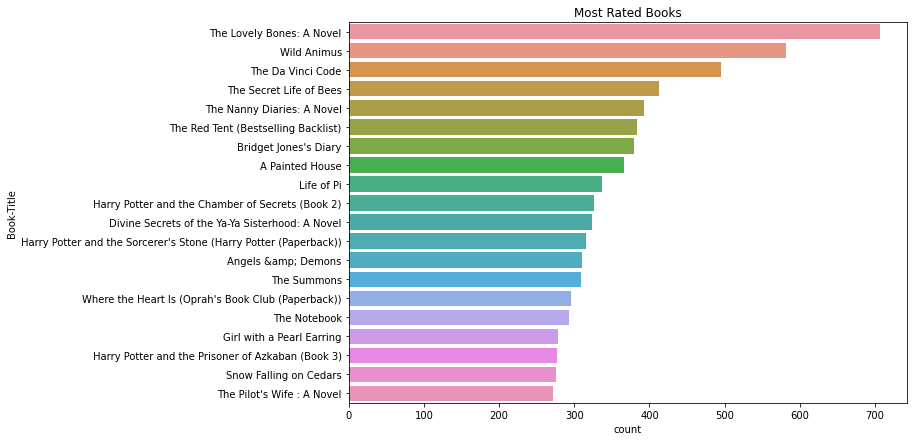

In [ ]:
# Most Read Books
most_read = df['Book-Title'].value_counts().reset_index()
most_read.columns = ['Book-Title','count']
#plotting
plt.figure(figsize = (10,7))
plt.title("Most Rated Books")
sns.barplot(x = 'count', y = 'Book-Title', data = most_read.head(20))
plt.show()

###Findings

*   'The Lovely Bones:A Novel' is the book with the highest number of ratings.

*   It is followed by 'Wild Animus' and 'The Da Vinci Code'

###**2. Top Book-Authors**

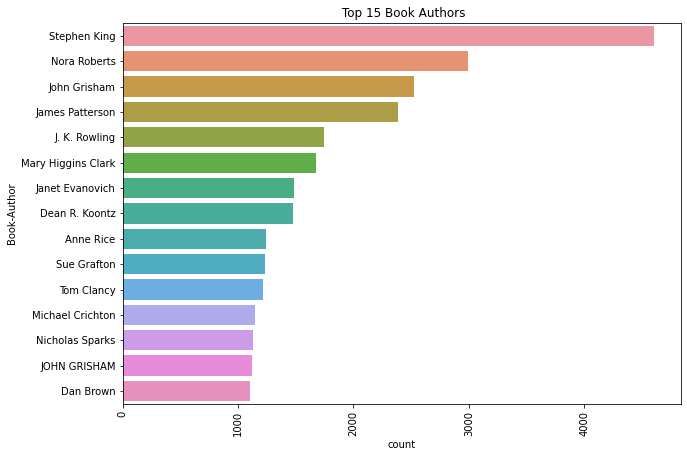

In [ ]:
# Top 15 book authors by number of interactions
plt.figure(figsize=(10,7))
sns.countplot(y="Book-Author",order=df['Book-Author'].value_counts().index[0:15],data=df).tick_params(axis='x', rotation=90)
plt.title(" Top 15 Book Authors")
plt.show()

###Findings
*  Analyzing the given data, one can conclude that Stephan King's books received the most number of ratings. 


###**Authors with the highest number of books**

In [ ]:
#finding authors with the highest number of books
most_books = df.groupby('Book-Author').agg({'Book-Title':"nunique"}).sort_values(by='Book-Title',ascending=False)
most_books.reset_index(inplace=True)
most_books.rename(columns={"Book-Title":"Book Count"},inplace=True)
most_books=most_books[:15]
most_books.head()

,Book-Author,Book Count
0,William Shakespeare,343
1,Agatha Christie,308
2,Stephen King,283
3,Barbara Cartland,279
4,Nora Roberts,211


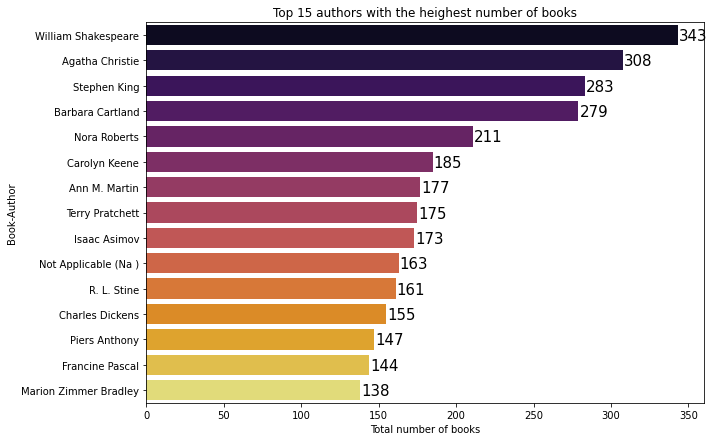

In [ ]:
#plotting top 15 authors and number of books 
plt.figure(figsize=(10,7))
ax = sns.barplot(most_books['Book Count'], most_books["Book-Author"], palette='inferno')
ax.set_title("Top 15 authors with the heighest number of books")
ax.set_xlabel("Total number of books")
totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.60, i.get_y()+.60,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

###Findings:


*  In the given dataset, the author with the highest number of books is William Shakespare, followed by Agatha Christie.



###**3. Top 15 Book-Publishers**

Text(0.5, 1.0, ' Top 15 Book Publisher')

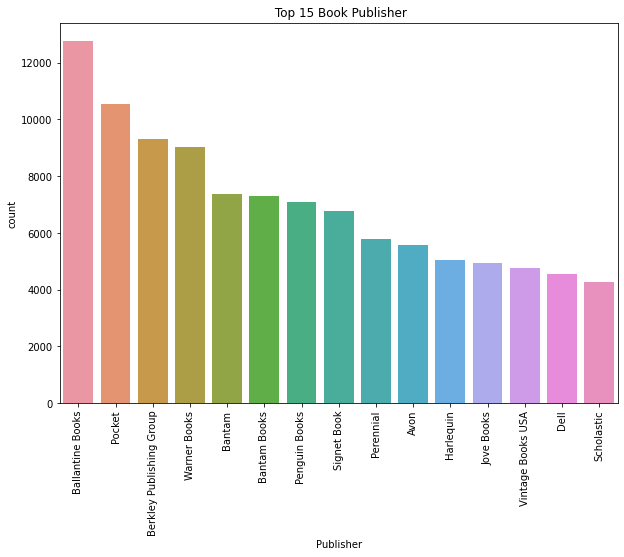

In [ ]:
#plotting top 15 book publishers
plt.figure(figsize=(10,7))
sns.countplot(x="Publisher",order=df['Publisher'].value_counts().index[0:15],data=df).tick_params(axis='x', rotation=90)
plt.title(" Top 15 Book Publisher")

###Findings:




*   Top publishers on the basis of the number of ratings received for their books are 'Ballantine Books' and 'Pocket'.


###**4. Number of ratings from each city**

Text(0.5, 1.0, 'No of ratings from each city (Top 10)')

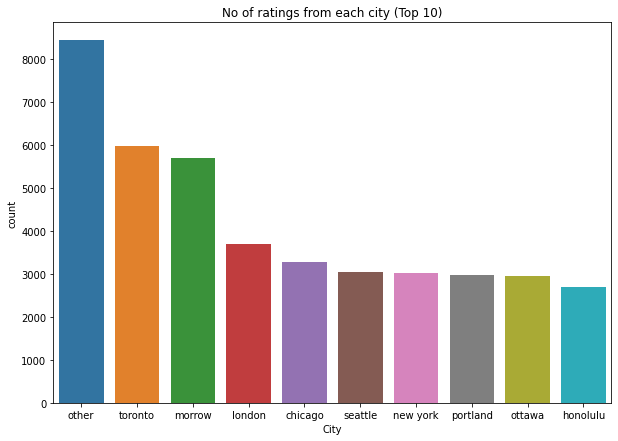

In [ ]:
#plotting top 10 cities on the basis of number of ratings 
plt.figure(figsize=(10,7))
sns.countplot(x="City",order=df['City'].value_counts().index[0:10],data=df)
plt.title("No of ratings from each city (Top 10)")

###**5. Number of ratings from each State**

Text(0.5, 1.0, 'No of ratings from each State (Top 10)')

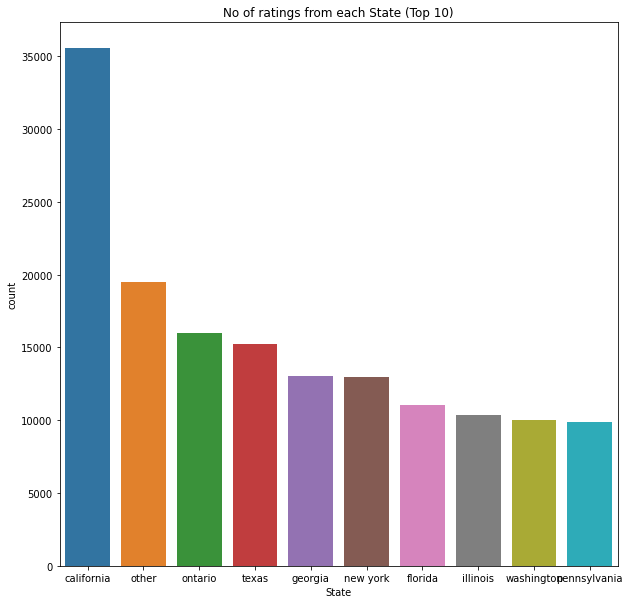

In [ ]:
#plotting top 10 states on the basis of number of ratings
plt.figure(figsize=(10,10))
sns.countplot(x="State",order=df['State'].value_counts().index[0:10],data=df)
plt.title("No of ratings from each State (Top 10)")

###Findings:




* California is the state from which the highest number of ratings are given.

###**6. Number of ratings from each Country**

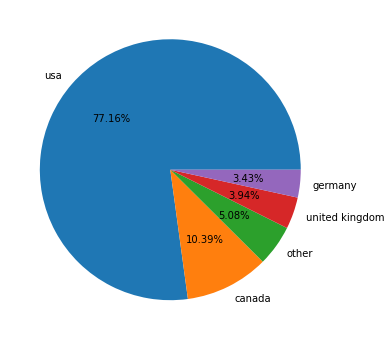

In [ ]:
# Top Countries 
Auther= df.Country.value_counts().index
values = df.Country.value_counts().values
# Pie Chart Top 5
plt.figure(figsize = (10,6))
#Ploting pie chart by labeling the wedges with their numeric value
plt.pie(values[:5], labels=Auther[:5],autopct="%1.2f%%")
plt.show()

###It can be observed that 77.16% of the ratings is from the Country USA. Now let's check the ratings from each state in USA

In [ ]:
#creating dataframe with details of USA
df_=df[df['Country']=='usa']

Text(0.5, 1.0, 'No of ratings from each Country (Top 10)')

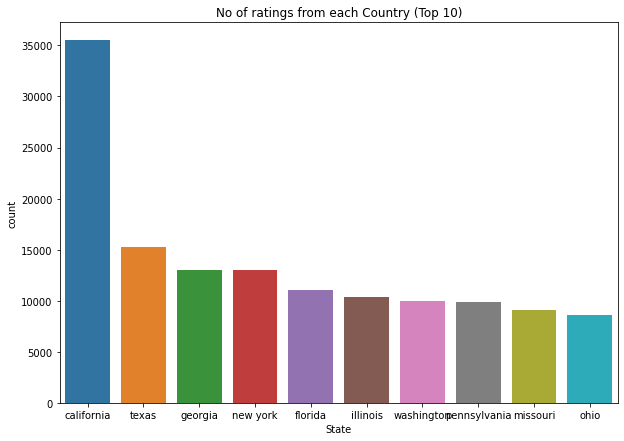

In [ ]:
#plotting number of ratings from each state in USA
plt.figure(figsize=(10,7))
sns.countplot(x="State",order=df_['State'].value_counts().index[0:10],data=df_)
plt.title("No of ratings from each Country (Top 10)")

###Findings:




* We have already seen that California is the state from which the highest number of ratings are given. Since California is a state in USA, it is obvious that California is the top state in USA on the basis of number of ratings given.


###**7. Age distribution**

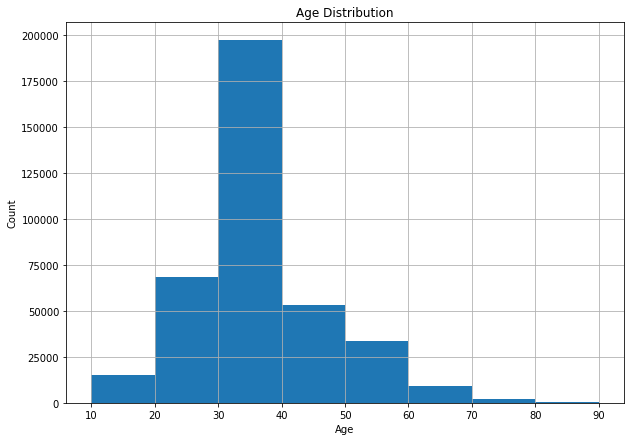

In [ ]:
#plotting age distribution
plt.figure(figsize=(10,7))
df.Age.hist(bins=[10*i for i in range(1, 10)])     
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

###It can be observed that most of the ratings are given by people of age between 30-40 years. Now let us find out the most rated books by people of different age groups- Teenage, Youth, Middle-age and elderly.

In [ ]:
#creating a subset with required columns
df2=df[['Book-Title','Book-Author','Age']]

In [ ]:
#defining the category
category=pd.cut(df2['Age'],bins=[10,20,40,60,80],labels=['Teenage','Youth','Middle Age','Elderly'])

In [ ]:
#creating a new column of age group
df2.insert(3,'Age Group',category)

In [ ]:
#checking
df2

,Book-Title,Book-Author,Age,Age Group
1,Clara Callan,Richard Bruce Wright,32,Youth
9,Where You'll Find Me: And Other Stories,Ann Beattie,32,Youth
12,The Middle Stories,Sheila Heti,32,Youth
13,Jane Doe,R. J. Kaiser,32,Youth
15,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,32,Youth
...,...,...,...,...
1017523,Sobre La Utilidad y Los Perjuicios de La Historia,Friedrich Wilhelm Nietzsche,20,Teenage
1017525,Anthem,Ayn Rand,19,Teenage
1017526,A Student of Weather,Elizabeth Hay,39,Youth
1017527,Rimas y leyendas (ClÃ¡sicos Fraile ; 3),Gustavo Adolfo BÃ©cquer,22,Youth


In [ ]:
#creating separate dataframes with details of each group
Youth_df=df2[df2['Age Group']=='Youth']
Teenage_df=df2[df2['Age Group']=='Teenage']
Middle_age_df=df2[df2['Age Group']=='Middle Age']
Elderly_df=df2[df2['Age Group']=='Elderly']

In [ ]:
#creating function to plot most rated books by each age group
def books_by_age_group(category_df,title):
  plt.figure(figsize=(10,7))
  sns.countplot(x="Book-Title",order=category_df['Book-Title'].value_counts().index[0:10],data=category_df).tick_params(axis='x', rotation=90)
  plt.title(title)

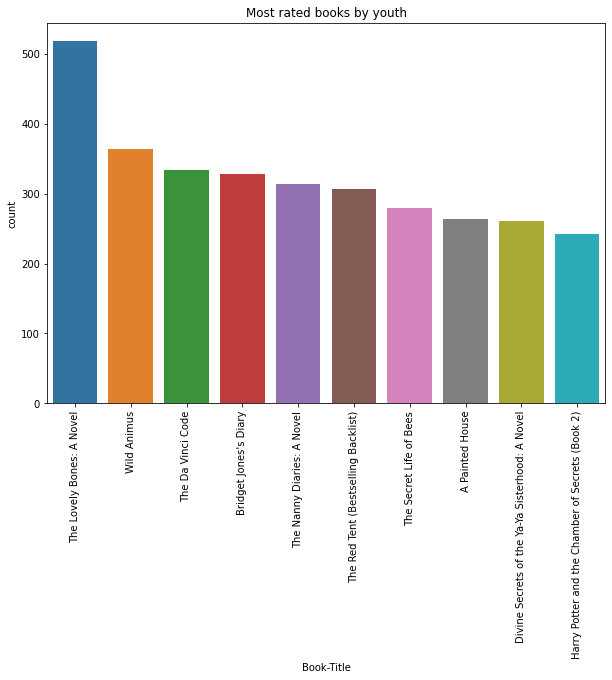

In [ ]:
#most rated books by youth
books_by_age_group(Youth_df,'Most rated books by youth')

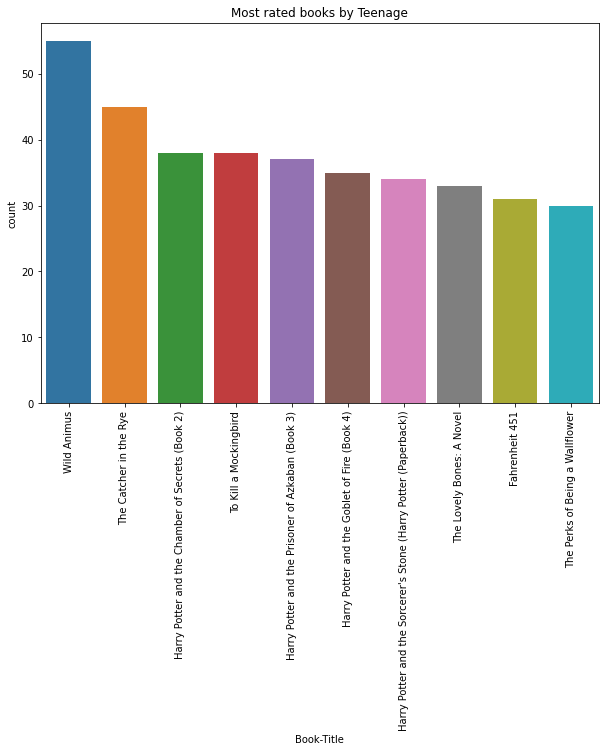

In [ ]:
#most rated books by Teenage
books_by_age_group(Teenage_df,'Most rated books by Teenage')

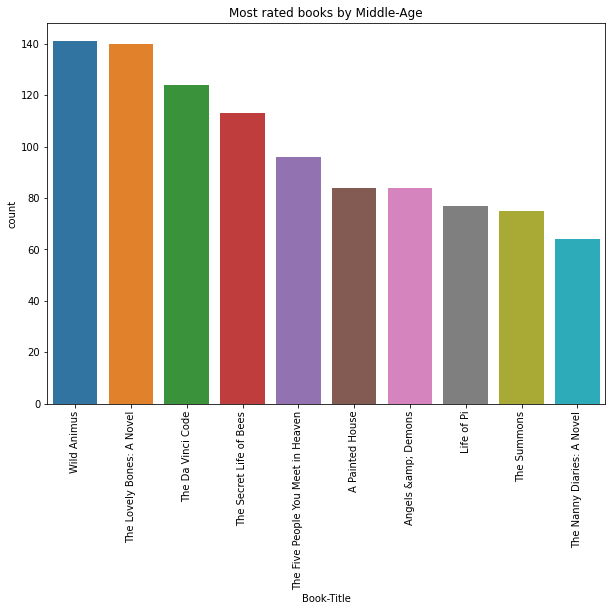

In [ ]:
#most rated books by Middle-aged
books_by_age_group(Middle_age_df,'Most rated books by Middle-Age')

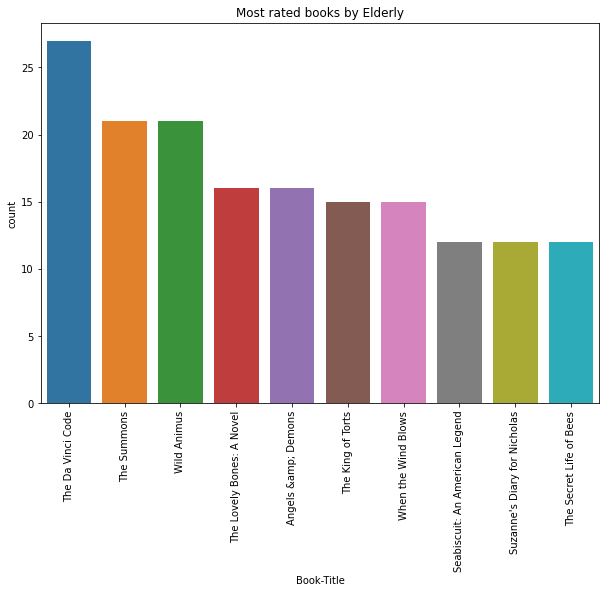

In [ ]:
#most rated books by Elderly
books_by_age_group(Elderly_df,'Most rated books by Elderly')

###Findings:




* 'Wild animus' is one of the most rated books irrespective of the age group.

#**Recommendation System**

###Now let's build recommendation systems to recommend books to users based on their past preference.

##**Popularity Based Recommendation System**

###It is a type of recommendation system which works on the principle of popularity and or anything which is in trend.

In [ ]:
# Top book based on rating
Top_Books= pd.DataFrame(df.groupby('Book-Title')['Book-Rating'].count()
                         .sort_values(ascending=False).head(10))

print('The Top 10 Books Recommendation : ')
#renaming columns
Top_Books.rename(columns={"Book-Rating":"Number Of Ratings"},inplace=True)
Top_Books.reset_index(inplace=True)
Top_Books.head(10)

The Top 10 Books Recommendation : 


,Book-Title,Number Of Ratings
0,The Lovely Bones: A Novel,707
1,Wild Animus,581
2,The Da Vinci Code,495
3,The Secret Life of Bees,413
4,The Nanny Diaries: A Novel,393
5,The Red Tent (Bestselling Backlist),383
6,Bridget Jones's Diary,380
7,A Painted House,366
8,Life of Pi,337
9,Harry Potter and the Chamber of Secrets (Book 2),326


###These are the popular books based on the number of ratings received.

##**Simple Recommendation System**

###This method is based on the concept of weighted rating.

In [ ]:
#creating dataframe with required columns
df1=df[["ISBN",'Book-Author','Book-Title','Book-Rating']]
#creating dataframe with vote average and number of ratings 
votes_df= df1.groupby(["ISBN",'Book-Title','Book-Author']).agg({'Book-Rating':"mean",'Book-Title':"count"})
#lenghth of votes_df
print('# of users: %d' % len(votes_df))
#renaming columns
votes_df.rename(columns={"Book-Rating":"Average Rating", "Book-Title":"Number of Votes"},inplace=True)
votes_df.reset_index(inplace=True)
#sorting values in descending order
votes_df.sort_values(by="Number of Votes",ascending=False)

# of users: 147013


,ISBN,Book-Title,Book-Author,Average Rating,Number of Votes
21565,0316666343,The Lovely Bones: A Novel,Alice Sebold,8.185290,707
115998,0971880107,Wild Animus,Rich Shapero,4.390706,581
38210,0385504209,The Da Vinci Code,Dan Brown,8.426230,488
17692,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,8.182768,383
4042,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,7.887500,320
...,...,...,...,...,...
61929,0552993360,To Be Young: Some Chapters of Autobiography,Mary Lutyens,3.000000,1
61928,0552993255,Quiet War of Rebecca Sheldon,Kathleen Rowntree,7.000000,1
61927,0552991872,The Right True End,Stan Barstow,9.000000,1
61926,0552990566,Brother of the More Famous Jack,Barbara Trapido,7.000000,1


In [ ]:
# Calculate mean of vote average column
C = votes_df['Average Rating'].mean()
print("C:",C)
# Calculate the minimum number of votes required to be in the chart, m
m = votes_df['Number of Votes'].quantile(0.90)
print("m:",m)
# Filter out all qualified books into a new DataFrame
weighted_rating_df = votes_df.copy().loc[votes_df['Number of Votes'] >= m]
weighted_rating_df.shape

C: 7.528032305000495
m: 4.0


(18395, 5)

In [ ]:
# Function that computes the weighted rating of each book
def weighted_rating(votes_df, m=m, C=C):
    v = votes_df['Number of Votes']
    R = votes_df['Average Rating']
    #Calculation of weighted average
    return (v/(v+m) * R) + (m/(m+v) * C)

# Define a new feature 'score' and calculate its value with weighted_rating()
weighted_rating_df['score'] = weighted_rating_df.apply(weighted_rating, axis=1)

In [ ]:
##Sort books based on score calculated above
weighted_rating_df.sort_values('score', ascending=False,inplace=True)

#Print the top 15 books
weighted_rating_df[["ISBN",'Book-Title',"Book-Author", 'Average Rating', 'Number of Votes', 'score']].head(10)

,ISBN,Book-Title,Book-Author,Average Rating,Number of Votes,score
45823,0439425220,Harry Potter and the Chamber of Secrets Postcard Book,J. K. Rowling,9.869565,23,9.522671
70304,0618002235,"The Two Towers (The Lord of the Rings, Part 2)",J. R. R. Tolkien,9.720000,25,9.417660
2638,0060256656,The Giving Tree,Shel Silverstein,9.750000,20,9.379672
102335,0836213319,Dilbert: A Book of Postcards,Scott Adams,9.923077,13,9.359537
131090,1888054557,Postmarked Yesteryear: 30 Rare Holiday Postcards,Pamela E. Apkarian-Russell,10.000000,11,9.340809
23973,0345339738,"The Return of the King (The Lord of the Rings, Part 3)",J.R.R. TOLKIEN,9.402597,77,9.310026
102428,0836220889,Calvin and Hobbes,Bill Watterson,9.583333,24,9.289719
40331,0394800389,Fox in Socks (I Can Read It All by Myself Beginner Books),Dr. Seuss,9.785714,14,9.284007
102382,0836218221,The Authoritative Calvin and Hobbes (Calvin and Hobbes),Bill Watterson,9.600000,20,9.254672
86316,0743454529,"My Sister's Keeper : A Novel (Picoult, Jodi)",Jodi Picoult,9.545455,22,9.235082


##**Now let's create variables to store book name and number of books to recommend. This input shall be used in the coming models**

In [ ]:
#get book name and number of books to recommend
#"Harry Potter and the Chamber of Secrets (Book 2)"
book_name = input("Enter a book name: ")
number = int(input("Enter number of books to recommend: "))

Enter a book name: Harry Potter and the Chamber of Secrets (Book 2)
Enter number of books to recommend: 10


##**Author Based Recommendation System**

###This model recommends the top books by the same author.

In [ ]:
def author_based_recommendation(bookName,n):
  #Getting author name for the user input book
  author=weighted_rating_df.loc[weighted_rating_df['Book-Title'] == bookName].reset_index(drop = True).iloc[0]['Book-Author']

  print("The author of",bookName,"is",author)
  print("Top books by the same author are:\n")
  
  #Storing books written by the same author
  books_by_same_author_df = weighted_rating_df[weighted_rating_df['Book-Author'] == author]
  #Sorting books based on their average rating
  books_by_same_author_df = books_by_same_author_df.sort_values(by=['Average Rating'])
  recommended_books=[]
  w=0
  for i in books_by_same_author_df["Book-Title"]:
        #Avoiding recommending the same user input book aswell as repetation of recomendation and limitting number of recommendation
        #Stops when the number of recommendation  reaches total number of books written by the author
        if (i!= bookName) and (i not in recommended_books) and (len(recommended_books) < n) and (w<=len(books_by_same_author_df["Book-Title"])):
            recommended_books.append(i)
            w+=1
  
  for book in recommended_books:
    print(book)
  return recommended_books


In [ ]:
#Storing recommended books with printing
author_based = author_based_recommendation(book_name,number)

The author of Harry Potter and the Chamber of Secrets (Book 2) is J. K. Rowling
Top books by the same author are:

Harry Potter et le prisonnier d'Azkaban
Fantastic Beasts and Where to Find Them
Quidditch Through the Ages
Harry Potter y la cÃ¡mara secreta
Harry Potter y el cÃ¡liz de fuego
Harry Potter y la piedra filosofal
Harry Potter Y El Prisionero De Azkaban
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Book 1)


##**Collaborative Recommendation - k-Nearest Neighbors**



###We will create recommendation system using KNN algorithm.

In [ ]:
#Checking shape
df.shape

(378257, 11)

In [ ]:
# Filtering Users with atleast 100 interactions
criteria=df['User-ID'].value_counts()>100
#Storing index filtered users
criteria=criteria[criteria].index
#Subset of df with filtered users
final_dataset=df[df['User-ID'].isin(criteria)]
print("Shape of final_dataset:",final_dataset.shape)

Shape of final_dataset: (100549, 11)


In [ ]:
#Obtaining number of ratings for each books
number_rating=final_dataset.groupby('Book-Title')['Book-Rating'].count().reset_index()
number_rating.rename(columns={"Book-Rating":"Number-of-Ratings"},inplace=True)
#Merging with final dataset
final_rating = final_dataset.merge(number_rating, on="Book-Title")

## Filtering books with atleast 5 ratings
final_rating=final_rating[final_rating['Number-of-Ratings']>=5]
print("Shape of final_dataset:",final_dataset.shape)
final_rating.head()

Shape of final_dataset: (100549, 11)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Age,City,State,Country,Number-of-Ratings
1,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,11676,9,32,other,other,other,18
2,080410753X,The Kitchen God's Wife,Amy Tan,1992,Ivy Books,11676,8,32,other,other,other,18
3,080410753X,The Kitchen God's Wife,Amy Tan,1992,Ivy Books,110912,9,36,milpitas,california,usa,18
4,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,46398,9,37,san antonio,texas,usa,18
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,230522,7,52,colorado springs,colorado,usa,18


In [ ]:
#Creating pivot table
Book_pivot = final_rating.pivot_table(columns='User-ID',index='Book-Title',values='Book-Rating')
#Filling null values with zero
Book_pivot.fillna(0, inplace= True)
Book_pivot

User-ID,2033,2110,2276,4017,4385,5582,6242,6251,6543,6575,...,269566,270713,271448,271705,273113,274061,274301,275970,277427,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
'Salem's Lot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10 Lb. Penalty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16 Lighthouse Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zombies of the Gene Pool,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zoya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Converting to sparse matrix
from scipy.sparse import csr_matrix
book_sparse = csr_matrix(Book_pivot)
type(book_sparse)

scipy.sparse.csr.csr_matrix

In [ ]:
# Importing the model library
from sklearn.neighbors import NearestNeighbors
#Creating an instance of KNN
KNN_model = NearestNeighbors(algorithm='brute')
#Fitting model
KNN_model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [ ]:
# define fuction for for output
def knn_recommendation(bookName,n):

  ''' Take input as book name & Returns n book suggestion based on distance'''

  print("KNN Model Based Recommendations:\n")

  #Getting bookID
  book_id= np.where(Book_pivot.index==bookName)[0][0]
  #Storing distances and suggestions
  distances, suggestions=KNN_model.kneighbors(Book_pivot.iloc[book_id, :].values.reshape(1,-1),n_neighbors=n+1)
  #Flatten the array
  suggestions=suggestions.flatten().tolist()
  #Empty list to store recommended items
  sim_items=[]
  for i in range(len(suggestions)):
    #If book is same as ser input
    if i==0:
      print("Recommended books for the book",bookName,"are:\n")
    else:
      print(Book_pivot.index[suggestions[i]])
      #Append recommended books 
      sim_items.append(Book_pivot.index[suggestions[i]])
  return sim_items

In [ ]:
# Lets try our model
knn_rec=knn_recommendation(book_name,number)

KNN Model Based Recommendations:

Recommended books for the book Harry Potter and the Chamber of Secrets (Book 2) are:

Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Harry Potter and the Sorcerer's Stone (Book 1)
Dragons of Autumn Twilight (Dragonlance Chronicles, Vol 1)
The Shelters of Stone (Earth's Children Series, No 5)
Farmer Boy (Little House)
The Eye of the World (The Wheel of Time, Book 1)
The Secret of the Indian (Indian in the Cupboard)
The First Four Years (Little House)


###Now we will implement the same algorithm using the metric cosine.


In [ ]:
#Creating an instance of KNN
cosine_model = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
#Fitting model
cosine_model.fit(book_sparse)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
# define fuction for for output
def cosine_similairty_recommendation(bookName,number):

  print("Cosine Similarity  Based Recommendations:\n")
  print("Recommended books for the book",bookName,"are:\n")
  #Store distances and indices of n neighbors
  distances, indices = cosine_model.kneighbors(Book_pivot.loc[bookName].values.reshape(1, -1), n_neighbors = number+1)
  #Empty list to store recommended items
  sim_items=[]
  for i in range(0, len(distances.flatten())):
      #Avoiding recommending user input book
      if i > 0:
        print(Book_pivot.index[indices.flatten()[i]]) 
        #Append recommended items 
        sim_items.append(Book_pivot.index[indices.flatten()[i]])
  return sim_items

In [ ]:
#calling function
cosine_sim_rec=cosine_similairty_recommendation(book_name,number)

Cosine Similarity  Based Recommendations:

Recommended books for the book Harry Potter and the Chamber of Secrets (Book 2) are:

Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Order of the Phoenix (Book 5)
The Fellowship of the Ring (The Lord of the Rings, Part 1)
Charlotte's Web (Trophy Newbery)
Dragons of Autumn Twilight (Dragonlance Chronicles, Vol 1)
Farmer Boy (Little House)
The Eye of the World (The Wheel of Time, Book 1)


Great our model work pretty much good after comparing with another distance based model.

##**Collaborative Recommendation - Singular Value Decomposition**

In [ ]:
#Importing libraries
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from scipy.sparse.linalg import svds
import random
import math

In [ ]:
#Filtering books with nonzero ratings
explicit_ratings_df = combined_df[combined_df["Book-Rating"] != 0]
explicit_ratings_df.shape

(378257, 11)

In [ ]:
#Subset with required columns
df3 = explicit_ratings_df[["User-ID","ISBN","Book-Title","Book-Rating"]]
df3.head()

,User-ID,ISBN,Book-Title,Book-Rating
1,8,0002005018,Clara Callan,5
9,8,074322678X,Where You'll Find Me: And Other Stories,5
12,8,0887841740,The Middle Stories,5
13,8,1552041778,Jane Doe,5
15,8,1567407781,The Witchfinder (Amos Walker Mystery Series),6


###Filtering books

In [ ]:
#Filtering books with atleast 5 reviews
df3 = df3.groupby("ISBN").filter(lambda x : len(x) > 5)
df3["ISBN"].value_counts()

0316666343    707
0971880107    581
0385504209    488
0312195516    383
0060928336    320
             ... 
0440224608    6  
037371128X    6  
0316800945    6  
0399151729    6  
0812507371    6  
Name: ISBN, Length: 10581, dtype: int64

In [ ]:
df3.shape

(175360, 4)

In [ ]:
print('# of interactions: %d' % len(df3))

# of interactions: 175360


###Filtering users

In [ ]:
#Creating dataframe of users interaction count
users_interactions_count_df = df3.groupby(["User-ID","ISBN"]).size().groupby('User-ID').size()
print('# of users: %d' % len(users_interactions_count_df))
#Filtering users with enough interactions
users_with_enough_interactions_df = users_interactions_count_df[users_interactions_count_df > 5].reset_index()[['User-ID']]
print('# of users with at least 5 interactions: %d' % len(users_with_enough_interactions_df))
users_with_enough_interactions_df.head()

# of users: 44665
# of users with at least 5 interactions: 5855


,User-ID
0,114
1,243
2,244
3,254
4,388


In [ ]:
print('# of interactions: %d' % len(df3))
#Merging
interactions_from_selected_users_df = df3.merge(users_with_enough_interactions_df, 
               how = 'right',
               left_on = 'User-ID',
               right_on = 'User-ID')
print('# of interactions from users with at least 10 interactions: %d' % len(interactions_from_selected_users_df))

# of interactions: 175360
# of interactions from users with at least 10 interactions: 113262


In [ ]:
interactions_full_df = interactions_from_selected_users_df.copy()

In [ ]:
def smooth_user_preference(x):
    '''Function to smooth column'''
    return math.log(1+x, 2)
#applying function
interactions_full_df["Book-Rating"]= interactions_full_df["Book-Rating"].apply(smooth_user_preference)
print('# of unique user/item interactions: %d' % len(interactions_full_df))
interactions_full_df.head()

# of unique user/item interactions: 113262


,User-ID,ISBN,Book-Title,Book-Rating
0,114,0446608653,The Alibi,3.321928
1,114,0446612545,The Beach House,3.321928
2,114,0446612618,A Kiss Remembered,3.169925
3,114,0451208080,The Short Forever,3.169925
4,114,0553584383,Dead Aim,3.321928


In [ ]:
#Checking for duplicates
len(interactions_full_df[interactions_full_df[['User-ID','ISBN']].duplicated()])

42

In [ ]:
#Removing duplicates
interactions_full_df = interactions_full_df.drop_duplicates(
  subset = ['User-ID', 'ISBN'],
  keep = 'last').reset_index(drop = True)
#Checking shape
interactions_full_df.shape

(113220, 4)

In [ ]:
#Train test split
interactions_train_df, interactions_test_df = train_test_split(interactions_full_df,
                                   stratify=interactions_full_df['User-ID'],                            
                                   test_size=0.20,
                                   random_state=0)
#Checking shape
print('# interactions on Train set: %d' % len(interactions_train_df))
print('# interactions on Test set: %d' % len(interactions_test_df))

# interactions on Train set: 90576
# interactions on Test set: 22644


In [ ]:
#Creating a sparse pivot table with users in rows and items in columns
users_items_pivot_matrix_df = interactions_train_df.reset_index().pivot(index='User-ID', 
                                                          columns='ISBN', 
                                                          values='Book-Rating').fillna(0)

users_items_pivot_matrix_df.head()

ISBN,0002005018,0002251760,000648302X,0006551971,0006742939,0007110928,0007122039,0007141076,0007154615,000716226X,...,880781210X,8807813025,881787017X,8838910170,8845247414,9074336329,950491036X,9681500555,968150108X,9726101794
User-ID,,,,,,,,,,,,,,,,,,,,,
114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Checking shape
users_items_pivot_matrix_df.shape

(5855, 10469)

In [ ]:
#Storing user ids
users_ids = list(users_items_pivot_matrix_df.index)

In [ ]:
# The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 15

#Performs matrix factorization of the original user item matrix
U, sigma, Vt = svds(users_items_pivot_matrix_df, k = NUMBER_OF_FACTORS_MF)

In [ ]:
#Converting sigma into diagonal matrix
sigma = np.diag(sigma)
sigma.shape

(15, 15)

In [ ]:
#Taking dot products 
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 

In [ ]:
#Converting the reconstructed matrix back to a Pandas dataframe
cf_preds_df = pd.DataFrame(all_user_predicted_ratings, columns = users_items_pivot_matrix_df.columns, index=users_ids).transpose()
cf_preds_df.head()

,114,243,244,254,388,446,503,505,507,638,...,278221,278314,278356,278390,278418,278535,278554,278582,278633,278843
ISBN,,,,,,,,,,,,,,,,,,,,,
0002005018,0.001955,0.001998,0.000748,0.001509,0.000376,-3.315894e-07,0.000559,-0.000013,0.002167,-0.001372,...,0.000615,-0.000030,-0.001229,0.001409,0.000225,-0.002081,0.000436,-0.000467,0.000544,0.001007
0002251760,0.005213,0.002380,0.000737,0.024142,0.000149,-1.160931e-05,0.002576,0.008307,0.008111,-0.007180,...,0.000674,0.000634,-0.004228,0.003577,0.015668,-0.012844,0.000640,-0.003262,-0.012699,0.000033
000648302X,-0.004245,-0.000868,0.002871,-0.000737,0.000887,-1.862764e-04,0.001520,0.005631,0.001421,0.006179,...,0.001967,0.002167,-0.004959,-0.003900,0.005653,-0.000741,-0.001843,-0.013890,0.001188,0.000717
0006551971,-0.000136,-0.000125,0.000050,0.001892,0.000131,3.492248e-05,0.000429,0.001404,0.000838,0.000336,...,0.000598,-0.000062,-0.001299,-0.000118,0.001958,-0.001073,-0.000199,-0.000751,-0.000128,-0.000025
0006742939,-0.000921,0.001539,0.001435,0.018369,0.000358,1.646898e-04,0.000865,0.001646,-0.000487,-0.001531,...,0.001287,0.000088,0.006579,-0.001127,0.001651,-0.002188,-0.000029,-0.003363,-0.001720,0.004291


In [ ]:
#Checking length
len(cf_preds_df.columns)

5855

In [ ]:
#Indexing by personId to speed up the searches during evaluation
interactions_full_indexed_df = interactions_full_df.set_index('User-ID')
interactions_train_indexed_df = interactions_train_df.set_index('User-ID')
interactions_test_indexed_df = interactions_test_df.set_index('User-ID')

In [ ]:
class CFRecommender:
    #Storing model name
    MODEL_NAME = 'Collaborative Filtering'
    
    def __init__(self, cf_predictions_df, items_df=None):
        #Creating attributes
        self.cf_predictions_df = cf_predictions_df
        self.items_df = items_df
        
    def get_model_name(self):
        '''This will return model name'''
        return self.MODEL_NAME
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10, verbose=False):
        # Get and sort the user's predictions
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'Book-Rating'})

        # Recommend the highest predicted rating content that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['ISBN'].isin(items_to_ignore)].sort_values('Book-Rating', ascending = False).head(topn)

        if verbose:
            #runs only if verbose=True
            if self.items_df is None:
                raise Exception('"items_df" is required in verbose mode')
            #Merging 
            recommendations_df = recommendations_df.merge(self.items_df, how = 'left', 
                                                          left_on = 'ISBN', 
                                                          right_on = 'ISBN')[["ISBN",'Book-Title',	'Book-Author', 'Year-Of-Publication',	'Publisher']]

        return recommendations_df

#Creating object of the class   
cf_recommender_model = CFRecommender(cf_preds_df, books_df)

In [ ]:
def get_items_interacted(person_id, interactions_df):
    '''
    This function will take user id as input and return interacted items
    '''
    interacted_items = interactions_df.loc[person_id]['ISBN']
    #Repetation is avoided by taking set
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])

In [ ]:
#Recommendation for a single user
cf_recommender_model.recommend_items(users_ids[0],items_to_ignore= get_items_interacted(users_ids[0],interactions_train_indexed_df),verbose=True)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday
1,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
2,0142001740,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books
3,1400031354,Tears of the Giraffe (No.1 Ladies Detective Agency),Alexander McCall Smith,2002,Anchor
4,0375726403,Empire Falls,Richard Russo,2002,Vintage Books USA
5,0440236673,The Brethren,John Grisham,2000,Island
6,0375727345,House of Sand and Fog,Andre Dubus III,2000,Vintage Books
7,0446610038,1st to Die: A Novel,James Patterson,2002,Warner Vision
8,0449212602,The Handmaid's Tale,Margaret Atwood,1989,Fawcett Books
9,0440234743,The Testament,John Grisham,1999,Dell


#**Evaluation - Singular Value Decomposition**

In [ ]:
# Function for getting the set of items which a user has not interacted with
def get_not_interacted_items_sample(person_id, sample_size, seed=42):
    #Storing interacted items
    interacted_items = get_items_interacted(person_id, interactions_full_indexed_df)
    #Getting set of all items
    all_items=set(interactions_full_indexed_df["ISBN"])
    #Obtaining non interacted items
    non_interacted_items = all_items - interacted_items

    random.seed(seed)
    #Selecting random sample of given sample_size
    non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
    return set(non_interacted_items_sample)

In [ ]:
#Top-N accuracy metrics
EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS = 100

class ModelEvaluator:

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                #Stores index of item id if it is present in the recommended_items
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                #If item id is not found in the recommended list
                index = -1
            #checking whether index is present in the topN items or not
            hit = int(index in range(0, topn))
            return hit, index
    
    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):
        
        # Getting the items in test set
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]
        
        #Obtaining unique interacted items by the user
        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([(interacted_values_testset['ISBN'])])
            
        interacted_items_count_testset = len(person_interacted_items_testset) 

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df),topn=10000000000)

        hits_at_5_count = 0
        hits_at_10_count = 0
        
        # For each item the user has interacted in test set
        for item_id in person_interacted_items_testset:
            
            # Getting a random sample of 100 items the user has not interacted with
            non_interacted_items_sample = get_not_interacted_items_sample(person_id, sample_size=100, seed=42)

            # Combining the current interacted item with the 100 random items
            items_to_filter_recs = non_interacted_items_sample.union(set([item_id]))

            # Filtering only recommendations that are either the interacted item or from a random sample of 100 non-interacted items
            valid_recs_df = person_recs_df[person_recs_df['ISBN'].isin(items_to_filter_recs)]                    
            valid_recs = valid_recs_df['ISBN'].values
            
            # Verifying if the current interacted item is among the Top-N recommended items
            hit_at_5, index_at_5 = self._verify_hit_top_n(item_id, valid_recs, 5)
            #Counting hit at 5
            hits_at_5_count += hit_at_5
            hit_at_10, index_at_10 = self._verify_hit_top_n(item_id, valid_recs, 10)
            #Counting hit at 10
            hits_at_10_count += hit_at_10

        # Recall is the rate of the interacted items that are ranked among the Top-N recommended items
        recall_at_5 = hits_at_5_count / float(interacted_items_count_testset)
        recall_at_10 = hits_at_10_count / float(interacted_items_count_testset)
        
        #Creating a dictionary
        person_metrics = {'hits@5_count':hits_at_5_count, 
                          'hits@10_count':hits_at_10_count, 
                          'interacted_count': interacted_items_count_testset,
                          'recall@5': recall_at_5,
                          'recall@10': recall_at_10}
        return person_metrics

    
    # Function to evaluate the performance of model at overall level
    def evaluate_model(self, model):
        
        people_metrics = []
        
        #Calculating metrics for all users in the test set
        for idx, person_id in enumerate(list(interactions_test_indexed_df.index.unique().values)):    
            #Returns dictionary containing person_metrics for each user
            person_metrics = self.evaluate_model_for_user(model, person_id)  
            #Adds user_id to the dictionary
            person_metrics['_person_id'] = person_id
            #Appends each dictionary to the list
            people_metrics.append(person_metrics)
            
        print('%d users processed' % idx)
        #Creates dataframe containing value of metrics for all the users using the list of dictionaries
        detailed_results_df = pd.DataFrame(people_metrics).sort_values('interacted_count', ascending=False)
        
        #Calculating global recall@5 and global recall@10
        global_recall_at_5 = detailed_results_df['hits@5_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_10 = detailed_results_df['hits@10_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        
        #Creates dictionary containing global metrics
        global_metrics = {'modelName': model.get_model_name(),
                          'recall@5': global_recall_at_5,
                          'recall@10': global_recall_at_10}    
        return global_metrics, detailed_results_df
    
model_evaluator = ModelEvaluator()    

In [ ]:
#Printing result
print('Evaluating Collaborative Filtering (SVD Matrix Factorization) model...')
cf_global_metrics, cf_detailed_results_df = model_evaluator.evaluate_model(cf_recommender_model)

print('\nGlobal metrics:\n%s' % cf_global_metrics)
cf_detailed_results_df.head(10)

Evaluating Collaborative Filtering (SVD Matrix Factorization) model...
5854 users processed

Global metrics:
{'modelName': 'Collaborative Filtering', 'recall@5': 0.3031266560678325, 'recall@10': 0.4149443561208267}


,hits@5_count,hits@10_count,interacted_count,recall@5,recall@10,_person_id
2,39,74,536,0.072761,0.138060,11676
94,68,76,138,0.492754,0.550725,98391
146,36,50,92,0.391304,0.543478,153662
290,24,37,88,0.272727,0.420455,16795
188,40,51,72,0.555556,0.708333,114368
112,18,19,72,0.250000,0.263889,95359
320,23,26,61,0.377049,0.426230,104636
163,13,20,54,0.240741,0.370370,158295
741,42,44,54,0.777778,0.814815,123883
135,5,17,52,0.096154,0.326923,204864


In [ ]:
print("Evaluating the Collaborative Filtering model (SVD matrix factorization), we observe that we got Recall@5 {}% and Recall@10 {}%."
.format(round(cf_global_metrics['recall@5'],2)*100,round(cf_global_metrics['recall@10'],2)*100))

Evaluating the Collaborative Filtering model (SVD matrix factorization), we observe that we got Recall@5 30.0% and Recall@10 41.0%.


#**Conclusion**

###We started the project with pre-processing in which the three datasets- Books, Ratings and Users were pre-processed and merged into one dataframe. Then we did some EDA in which we tried to arrive at conclusions regarding Top Books, Top Authors, and Top publishers. We also analyzed the location and age and recorded the findings.
###Then we built different types of recommendation models to recommend books and evaluated one of these recommendation models-Collaborative Filtering Based Recommendation - Singular Value Decomposition. We got a Recall@5 of 30% and Recall@10 of 41%.
###Recall@5 about 30% implies that about 30% of interacted items in the test set were ranked by our model among the top 5. And Reacall@10 about 41% implies that about 41% of interacted items in the test set were ranked by our model among the top 10.
